# Assignment - Is MS Dhoni still good enough to bat? Analyze and convey your results using visualizations

### Analysing MS Dhoni's performance in IPl - Is he still good enough to bat 
### taking IPL_ball_by_ball.csv data 
### divide it in to before 2020 and latest 2021 & 2022 Seasons 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


#to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', None)
pd.set_option('max_colwidth', -1)

In [2]:
df = pd.read_csv('IPL_ball_by_ball_updated.csv')
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [3]:
df.innings.unique()

array([2, 1, 4, 3, 6, 5], dtype=int64)

In [4]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [5]:
df.innings.unique()

array([2, 1], dtype=int64)

In [6]:
df.shape

(225792, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225792 entries, 0 to 225952
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                225792 non-null  int64  
 1   season                  225792 non-null  int64  
 2   start_date              225792 non-null  object 
 3   venue                   225792 non-null  object 
 4   innings                 225792 non-null  int64  
 5   ball                    225792 non-null  float64
 6   batting_team            225792 non-null  object 
 7   bowling_team            225792 non-null  object 
 8   striker                 225792 non-null  object 
 9   non_striker             225792 non-null  object 
 10  bowler                  225792 non-null  object 
 11  runs_off_bat            225792 non-null  int64  
 12  extras                  225792 non-null  int64  
 13  wides                   7021 non-null    float64
 14  noballs             

In [8]:
df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

## Creating CSK's Dataframe

In [9]:
csk_df = df[df.batting_team == 'Chennai Super Kings']
csk_df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
460,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,13.2,Chennai Super Kings,Kings XI Punjab,MEK Hussey,JDP Oram,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,13.1,Chennai Super Kings,Kings XI Punjab,JDP Oram,MEK Hussey,JR Hopes,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
csk_df.shape

(25123, 22)

In [11]:
csk_df.match_id.unique()

array([ 335983,  335989,  335993,  335996,  336001,  336005,  336007,
        336009,  336013,  336018,  336025,  336029,  336033,  336037,
        336039,  336040,  392181,  392185,  392189,  392196,  392202,
        392206,  392209,  392214,  392217,  392224,  392227,  392231,
        392234,  392238,  419110,  419113,  419116,  419121,  419123,
        419125,  419129,  419133,  419137,  419142,  419147,  419153,
        419155,  419159,  419163,  419165,  501198,  501206,  501211,
        501215,  501221,  501226,  501228,  501236,  501240,  501245,
        501249,  501253,  501261,  501266,  501268,  501271,  548306,
        548311,  548316,  548318,  548322,  548330,  548332,  548343,
        548347,  548352,  548355,  548361,  548364,  548368,  548371,
        548379,  548380,  548381,  598002,  598007,  598012,  598015,
        598020,  598022,  598026,  598030,  598034,  598038,  598041,
        598046,  598051,  598058,  598062,  598068,  598070,  598073,
        729283,  729

In [12]:
len(csk_df.match_id.unique())

208

In [13]:
# runs scored
sum(csk_df.runs_off_bat)

31725

## CSK's data Before 2020 season

In [14]:
csk_df_old = csk_df[(csk_df.season <= 2020)]
csk_df_old.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
460,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,13.2,Chennai Super Kings,Kings XI Punjab,MEK Hussey,JDP Oram,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,13.1,Chennai Super Kings,Kings XI Punjab,JDP Oram,MEK Hussey,JR Hopes,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
len(csk_df_old.match_id.unique())

178

In [16]:
sum(csk_df_old.runs_off_bat) # total Runs Scored by CSK till 2020

26953

In [17]:
csk_df_latest = csk_df[(csk_df.season >= 2021)]
csk_df_latest.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
193896,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,19.6,Chennai Super Kings,Delhi Capitals,SM Curran,RA Jadeja,CR Woakes,0,0,NaN,NaN,NaN,NaN,NaN,bowled,SM Curran,NaN,NaN
193951,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,19.5,Chennai Super Kings,Delhi Capitals,RA Jadeja,SM Curran,CR Woakes,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
len(csk_df_latest.match_id.unique())

30

In [19]:
sum(csk_df_latest.runs_off_bat) # total Runs Scored by CSK in Season 2021 & 2022

4772

## Creating Dhoni's batting dataframe

In [20]:
dhoni_df= csk_df[csk_df.striker == 'MS Dhoni']
dhoni_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
556,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN
557,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1753,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,19.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,JDP Oram,MA Khote,0,0,NaN,NaN,NaN,NaN,NaN,caught,MS Dhoni,NaN,NaN
1818,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.3,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
dhoni_df.shape

(3321, 22)

In [22]:
len(dhoni_df.match_id.unique())

178

In [23]:
sum(dhoni_df.runs_off_bat) # total Runs Scored by Dhoni in all Seasons

4404

In [24]:
# Dhoni's Overall strike rate 
dhoni_SR = 100*sum(dhoni_df.runs_off_bat)/len(dhoni_df)

dhoni_SR

132.61065943992773

## till 2020

In [25]:
dhoni_df_old = dhoni_df[(dhoni_df.season <= 2020)]
dhoni_df_old.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
556,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN


In [26]:
dhoni_df_old.tail(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
190846,1216536,2020,2020-10-29,Dubai International Cricket Stadium,2,14.4,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni,RD Gaikwad,CV Varun,0,0,NaN,NaN,NaN,NaN,NaN,bowled,MS Dhoni,NaN,NaN


In [27]:
dhoni_df_old.shape

(3012, 22)

In [28]:
len(dhoni_df_old.match_id.unique())

155

In [29]:
sum(dhoni_df_old.runs_off_bat) # total Runs Scored by Dhoni till 2020 season

4058

In [30]:
# outs
len(dhoni_df_old[dhoni_df_old.player_dismissed == 'MS Dhoni'])

92

In [31]:
# strike rate
dhoni_old_SR = 100*sum(dhoni_df_old.runs_off_bat)/len(dhoni_df_old)

dhoni_old_SR

134.7277556440903

In [32]:
# RPI
sum(dhoni_df_old.runs_off_bat)/len(dhoni_df_old.match_id.unique())

26.18064516129032

In [33]:
# Team Contribution
100*sum(dhoni_df_old.runs_off_bat)/sum(csk_df_old['runs_off_bat']) # Dhoni's Team Contribution till season 2020 is approx 15%

15.055837940117984

## 2021 & 2022

In [34]:
dhoni_df_latest = dhoni_df[(dhoni_df.season >= 2021)]
dhoni_df_latest.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
194049,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,15.2,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,Avesh Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
dhoni_df_latest.shape

(309, 22)

In [36]:
len(dhoni_df_latest.match_id.unique())

23

In [37]:
sum(dhoni_df_latest.runs_off_bat)

346

In [38]:
# outs
len(dhoni_df_latest[dhoni_df_latest.player_dismissed == 'MS Dhoni'])

14

In [39]:
# strike rate
dhoni_latest_SR = 100*sum(dhoni_df_latest.runs_off_bat)/len(dhoni_df_latest)
dhoni_latest_SR

111.97411003236246

In [40]:
# RPI
sum(dhoni_df_latest.runs_off_bat)/len(dhoni_df_latest.match_id.unique())

15.043478260869565

In [41]:
# Team Contribution
100*sum(dhoni_df_latest.runs_off_bat)/sum(csk_df_latest['runs_off_bat']) # Dhoni's Team Contribution in 2021 and 2022 is only 7.25%

7.250628667225482

## Dhoni preformance
- till 2020 Runs =  4058 ,Strike Rate = 134 , Team Runs Contribution = 15%
- in 2021 & 2022 Runs =  346 ,Strike Rate = 112 , Team Runs Contribution = 7% 

# Visualizations

In [42]:
csk_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
460,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,13.2,Chennai Super Kings,Kings XI Punjab,MEK Hussey,JDP Oram,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
csk_df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10)

striker
SK Raina        4687
MS Dhoni        4404
F du Plessis    2721
AT Rayudu       1774
MEK Hussey      1768
M Vijay         1708
S Badrinath     1441
RA Jadeja       1440
SR Watson       1252
RD Gaikwad      1207
Name: runs_off_bat, dtype: int64

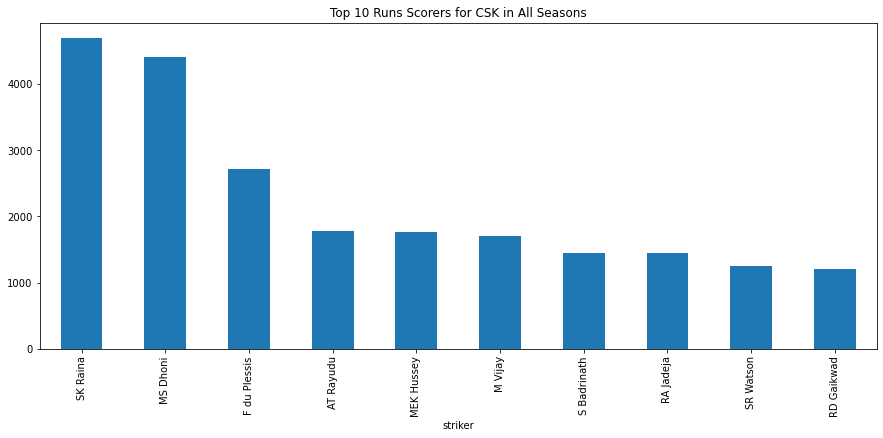

In [44]:
plt.figure(figsize = (15, 6))
csk_df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 Runs Scorers for CSK in All Seasons')
plt.show()

Text(0.5, 1.0, 'Runs by CSK Players In Season 2021 & 2022')

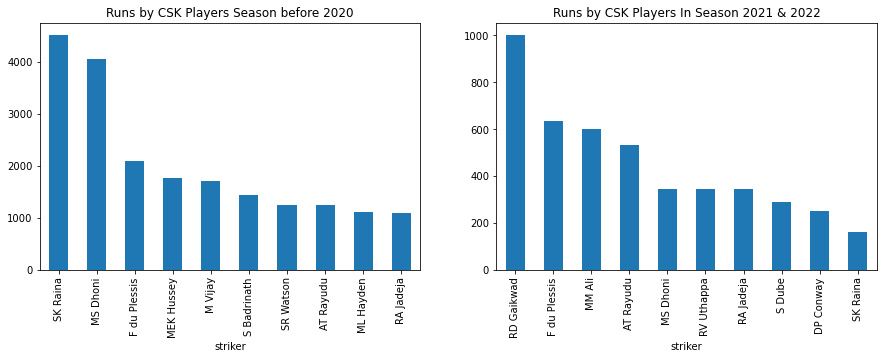

In [45]:
plt.figure(figsize = (15, 10))

plt.subplot(221)
csk_df_old.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Runs by CSK Players Season before 2020')

plt.subplot(222)
csk_df_latest.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Runs by CSK Players In Season 2021 & 2022')

In [46]:
dhoni_df.groupby(['season'])['runs_off_bat'].sum()

season
2008    414
2009    332
2010    287
2011    392
2012    358
2013    461
2014    371
2015    372
2018    455
2019    416
2020    200
2021    114
2022    232
Name: runs_off_bat, dtype: int64

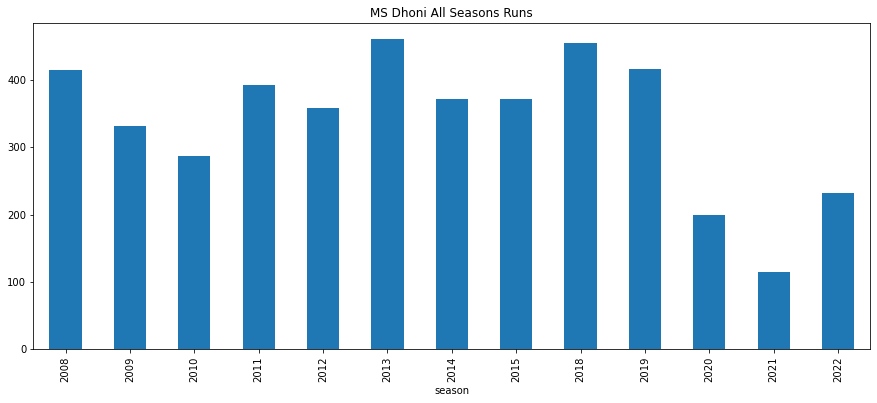

In [47]:
plt.figure(figsize = (15, 6))
dhoni_df.groupby(['season'])['runs_off_bat'].sum().plot(kind = 'bar')
plt.title('MS Dhoni All Seasons Runs')
plt.show()

Text(0.5, 1.0, 'Runs by MS Dhoni In Season 2021 & 2022')

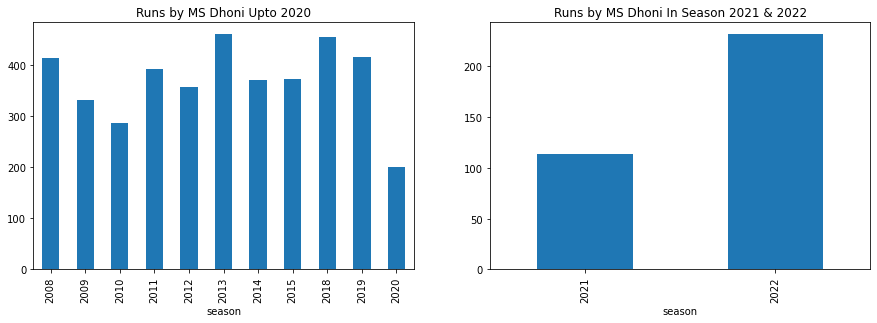

In [48]:
plt.figure(figsize = (15, 10))

plt.subplot(221)
dhoni_df_old.groupby(['season'])['runs_off_bat'].sum().plot(kind = 'bar')
plt.title('Runs by MS Dhoni Upto 2020')

plt.subplot(222)
dhoni_df_latest.groupby(['season'])['runs_off_bat'].sum().plot(kind = 'bar')
plt.title('Runs by MS Dhoni In Season 2021 & 2022')

In [49]:
csk_df1 = pd.DataFrame(csk_df_old.groupby('striker')['runs_off_bat'].sum()).reset_index()
csk_df1.head()

,striker,runs_off_bat
0,A Flintoff,62
1,A Mukund,0
2,A Nehra,1
3,AS Rajpoot,2
4,AT Rayudu,1243


In [50]:
csk_df2 =pd.DataFrame(csk_df_old.groupby('striker')['ball'].count()).reset_index()

In [51]:
csk_df2.head()

,striker,ball
0,A Flintoff,57
1,A Mukund,1
2,A Nehra,7
3,AS Rajpoot,6
4,AT Rayudu,1006


In [52]:
csk_df3 = csk_df1.merge(csk_df2, on = 'striker', how= 'left')
csk_df3.head()

,striker,runs_off_bat,ball
0,A Flintoff,62,57
1,A Mukund,0,1
2,A Nehra,1,7
3,AS Rajpoot,2,6
4,AT Rayudu,1243,1006


In [53]:
csk_df3['strike_rate'] = 100*csk_df3['runs_off_bat']/csk_df3['ball']
csk_df3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Flintoff,62,57,108.771930
1,A Mukund,0,1,0.000000
2,A Nehra,1,7,14.285714
3,AS Rajpoot,2,6,33.333333
4,AT Rayudu,1243,1006,123.558648


In [54]:
csk_df3= csk_df3[csk_df3.ball >= 300]
csk_df3

,striker,runs_off_bat,ball,strike_rate
4,AT Rayudu,1243,1006,123.558648
6,BB McCullum,841,634,132.649842
10,DJ Bravo,934,710,131.549296
14,DR Smith,965,766,125.979112
15,F du Plessis,2088,1652,126.392252
19,JA Morkel,827,591,139.932318
30,M Vijay,1708,1405,121.565836
32,MEK Hussey,1768,1461,121.013005
34,ML Hayden,1107,838,132.100239
36,MS Dhoni,4058,3012,134.727756


In [55]:
csk_df3.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10)

striker
SK Raina        4527
MS Dhoni        4058
F du Plessis    2088
MEK Hussey      1768
M Vijay         1708
S Badrinath     1441
SR Watson       1252
AT Rayudu       1243
ML Hayden       1107
RA Jadeja       1097
Name: runs_off_bat, dtype: int64

In [56]:
top_10= csk_df3[(csk_df3.striker == 'SK Raina') |(csk_df3.striker == 'MS Dhoni')|(csk_df3.striker == 'F du Plessis')|(csk_df3.striker == 'AT Rayudu')|(csk_df3.striker == 'MEK Hussey')|(csk_df3.striker == 'M Vijay')|(csk_df3.striker == 'S Badrinath')|(csk_df3.striker == 'RA Jadeja')|(csk_df3.striker == 'SR Watson')|(csk_df3.striker == 'RD Gaikwad')]

In [57]:
top_10.reset_index(inplace = True, drop =True)

In [58]:
top_10.sort_values('strike_rate', ascending = False)

,striker,runs_off_bat,ball,strike_rate
4,MS Dhoni,4058,3012,134.727756
8,SR Watson,1252,943,132.767762
7,SK Raina,4527,3410,132.756598
5,RA Jadeja,1097,849,129.210836
1,F du Plessis,2088,1652,126.392252
0,AT Rayudu,1243,1006,123.558648
2,M Vijay,1708,1405,121.565836
3,MEK Hussey,1768,1461,121.013005
6,S Badrinath,1441,1245,115.742972


In [59]:
top_10.sort_values('runs_off_bat', ascending = False)

,striker,runs_off_bat,ball,strike_rate
7,SK Raina,4527,3410,132.756598
4,MS Dhoni,4058,3012,134.727756
1,F du Plessis,2088,1652,126.392252
3,MEK Hussey,1768,1461,121.013005
2,M Vijay,1708,1405,121.565836
6,S Badrinath,1441,1245,115.742972
8,SR Watson,1252,943,132.767762
0,AT Rayudu,1243,1006,123.558648
5,RA Jadeja,1097,849,129.210836


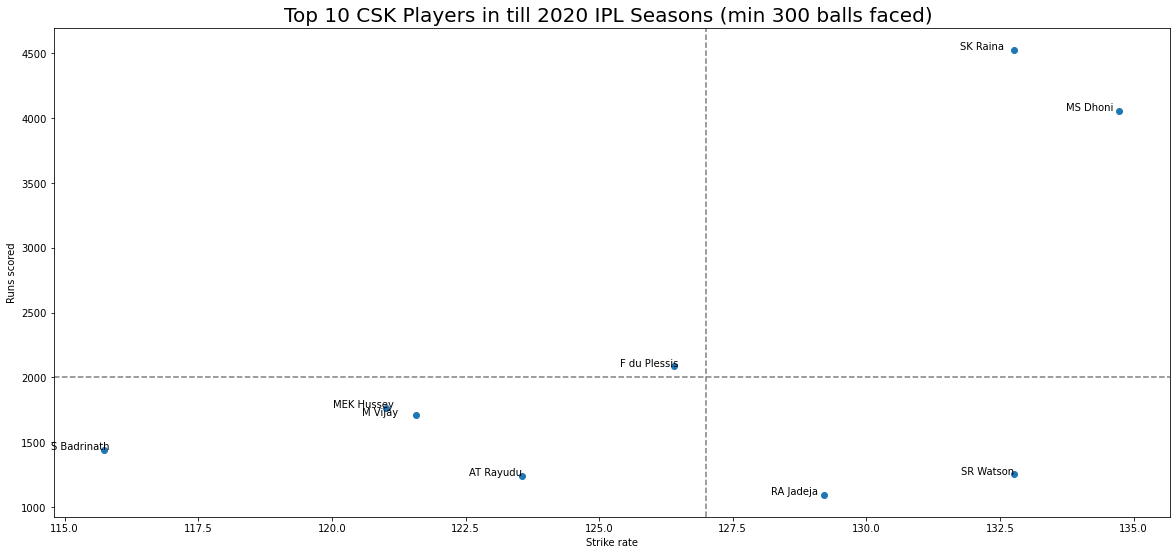

In [60]:
plt.figure(figsize = (20,9))
plt.scatter(top_10.strike_rate, top_10.runs_off_bat)
for i in range(len(top_10)):
    plt.text(top_10['strike_rate'][i]-1 , top_10['runs_off_bat'][i]+1 ,top_10['striker'][i])
plt.axvline(127, ls = '--', color = 'grey')
plt.axhline(2000, ls = '--', color = 'grey')
plt.title('Top 10 CSK Players in till 2020 IPL Seasons (min 300 balls faced) ', fontsize =20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

### Here we can see MS Dhoni's Strike rate is very good till 2020 IPL seasons

In [61]:
new_csk_df1 = pd.DataFrame(csk_df_latest.groupby('striker')['runs_off_bat'].sum()).reset_index()
new_csk_df1.head()

,striker,runs_off_bat
0,AT Rayudu,531
1,CJ Jordan,11
2,D Pretorius,44
3,DJ Bravo,70
4,DL Chahar,1


In [62]:
new_csk_df2 =pd.DataFrame(csk_df_latest.groupby('striker')['ball'].count()).reset_index()

In [63]:
new_csk_df2.head()

,striker,ball
0,AT Rayudu,405
1,CJ Jordan,9
2,D Pretorius,28
3,DJ Bravo,48
4,DL Chahar,1


In [64]:
csk_df3_latest = new_csk_df1.merge(new_csk_df2, on = 'striker', how= 'left')
csk_df3_latest.head()

,striker,runs_off_bat,ball
0,AT Rayudu,531,405
1,CJ Jordan,11,9
2,D Pretorius,44,28
3,DJ Bravo,70,48
4,DL Chahar,1,1


In [65]:
csk_df3_latest['strike_rate'] = 100*csk_df3_latest['runs_off_bat']/csk_df3_latest['ball']
csk_df3_latest.head()

,striker,runs_off_bat,ball,strike_rate
0,AT Rayudu,531,405,131.111111
1,CJ Jordan,11,9,122.222222
2,D Pretorius,44,28,157.142857
3,DJ Bravo,70,48,145.833333
4,DL Chahar,1,1,100.000000


In [66]:
csk_df3_latest= csk_df3_latest[csk_df3_latest.ball >= 100]

In [67]:
csk_df3_latest.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10)

striker
RD Gaikwad      1003
F du Plessis    633 
MM Ali          601 
AT Rayudu       531 
MS Dhoni        346 
RV Uthappa      345 
RA Jadeja       343 
S Dube          289 
DP Conway       252 
SK Raina        160 
Name: runs_off_bat, dtype: int64

In [68]:
top_10_latest= csk_df3_latest[(csk_df3_latest.striker == 'RD Gaikwad') |(csk_df3_latest.striker =='F du Plessis')|(csk_df3_latest.striker == 'MM Ali')|(csk_df3_latest.striker == 'AT Rayudu')|(csk_df3_latest.striker == 'MS Dhoni')|(csk_df3_latest.striker == 'RV Uthappa')|(csk_df3_latest.striker == 'RA Jadeja')|(csk_df3_latest.striker == 'S Dube')|(csk_df3_latest.striker == 'DP Conway')|(csk_df3_latest.striker == 'SK Raina')]

In [69]:
top_10_latest.reset_index(inplace = True, drop =True)

In [70]:
top_10_latest.sort_values('strike_rate', ascending = False)

,striker,runs_off_bat,ball,strike_rate
8,S Dube,289,194,148.969072
1,DP Conway,252,176,143.181818
2,F du Plessis,633,471,134.394904
3,MM Ali,601,453,132.671082
0,AT Rayudu,531,405,131.111111
6,RD Gaikwad,1003,772,129.922280
7,RV Uthappa,345,267,129.213483
5,RA Jadeja,343,275,124.727273
9,SK Raina,160,133,120.300752
4,MS Dhoni,346,309,111.974110


In [71]:
top_10_latest.sort_values('runs_off_bat', ascending = False)

,striker,runs_off_bat,ball,strike_rate
6,RD Gaikwad,1003,772,129.922280
2,F du Plessis,633,471,134.394904
3,MM Ali,601,453,132.671082
0,AT Rayudu,531,405,131.111111
4,MS Dhoni,346,309,111.974110
7,RV Uthappa,345,267,129.213483
5,RA Jadeja,343,275,124.727273
8,S Dube,289,194,148.969072
1,DP Conway,252,176,143.181818
9,SK Raina,160,133,120.300752


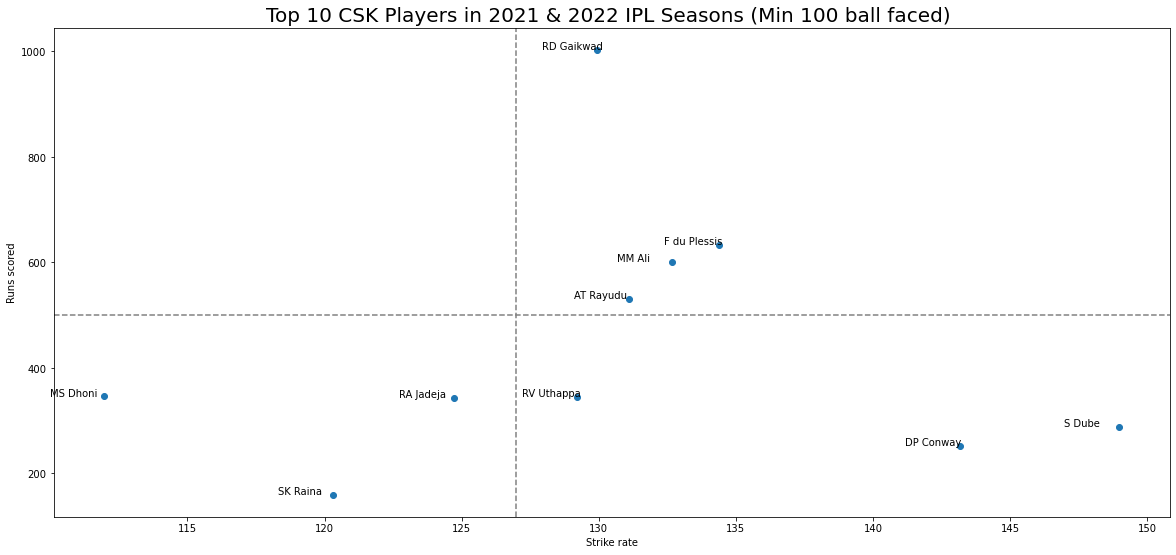

In [72]:
plt.figure(figsize = (20,9))
plt.scatter(top_10_latest.strike_rate, top_10_latest.runs_off_bat)
for i in range(len(top_10_latest)):
    plt.text(top_10_latest['strike_rate'][i]-2 , top_10_latest['runs_off_bat'][i]+1 ,top_10_latest['striker'][i])
plt.axvline(127, ls = '--', color = 'grey')
plt.axhline(500, ls = '--', color = 'grey')
plt.title('Top 10 CSK Players in 2021 & 2022 IPL Seasons (Min 100 ball faced) ', fontsize =20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

### Here we can see MS Dhoni's Strike rate is down in last 2 IPL seasons

# Conclusion

- As per This IPL Data Analysis we can conclude that MS dhonis performance not as per his records in last few seasons 
## Scope for more Analysis 
- we can more anlaysis with comparing like his Batting order plase or camparing with other Wicket Keepers and death overs finishing perfromance
- Though he not performed well last few Seasons his captancy is very important for team which led CSK to lift 2021 IPL title for 4th time

- Thank you